In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('candy-data.csv')

In [4]:
print('Shape of the data: ',data.shape)
display(data.head())

Shape of the data:  (85, 13)


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


### Exploratory data analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [6]:
# descriptive analysis
data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [7]:
# check unique variables. 
data['competitorname'].duplicated().sum()

0

In [8]:
win_median = round(data['winpercent'].median(), 2)
win_mean = round(data['winpercent'].mean(), 2)

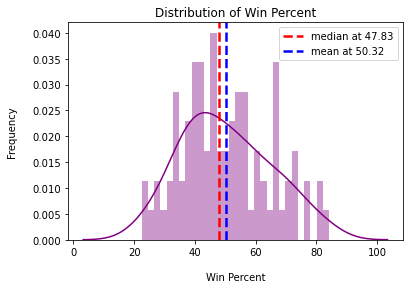

In [9]:
ax = sns.distplot(data['winpercent'],bins=30,color='purple')
plt.title("Distribution of Win Percent")
plt.xlabel("Win Percent", labelpad=15)
plt.ylabel("Frequency", labelpad=15)
names = ["median", "mean"]
colors = ['red', 'blue']
measurements = [win_median, win_mean]
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement,
                linestyle='--',
                linewidth=2.5,
                label='{0} at {1}'.format(name, measurement),
                c=color)
plt.legend();




In [10]:
# which product got the highest "win" percentage
data.sort_values('winpercent', ascending = False).head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782


In [11]:
# which product got the lowest "win" percentage
data.sort_values('winpercent', ascending = True).head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
44,Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
12,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988
72,Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865
26,Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439


In [12]:
# top 5 sugar percent
data.sort_values('sugarpercent', ascending = False).head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550
38,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.965,0.860,64.353340
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.941,0.220,55.103695
60,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140


In [13]:
# bottom 5 sugar percent
data.sort_values('sugarpercent', ascending = True).head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
30,Lemonhead,0,1,0,0,0,0,1,0,0,0.046,0.104,39.141056
12,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988


Remarks: There are some coins in the dataset. 

In [14]:
# top 5 price percent
data.sort_values('pricepercent', ascending = False).head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
62,Nestle Smarties,1,0,0,0,0,0,0,0,1,0.267,0.976,37.887188
44,Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341
55,Ring pop,0,1,0,0,0,0,1,0,0,0.732,0.965,35.290756
23,HersheyÕs Krackel,1,0,0,0,0,1,0,1,0,0.430,0.918,62.284481
40,Mr Good Bar,1,0,0,1,0,0,0,1,0,0.313,0.918,54.526451


In [15]:
data.set_index('competitorname', inplace = True)

In [16]:
# spearman correlation coefficient assumes that the data are not normally distributed and is continuous. 
corr_matrix = data[['sugarpercent','pricepercent','winpercent']].corr(method = 'spearman')

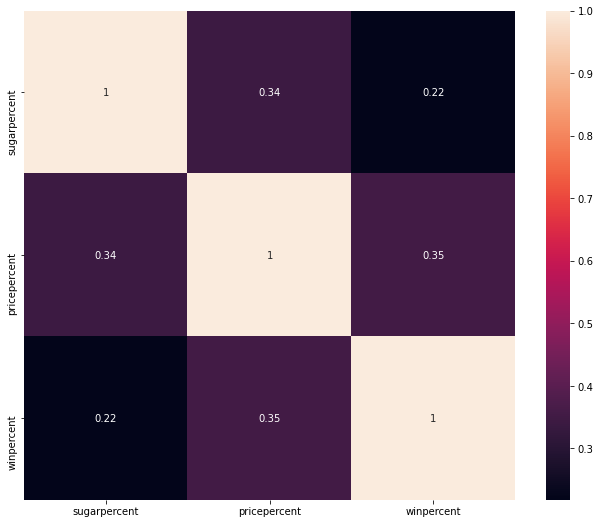

In [17]:
ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(corr_matrix, annot=True)

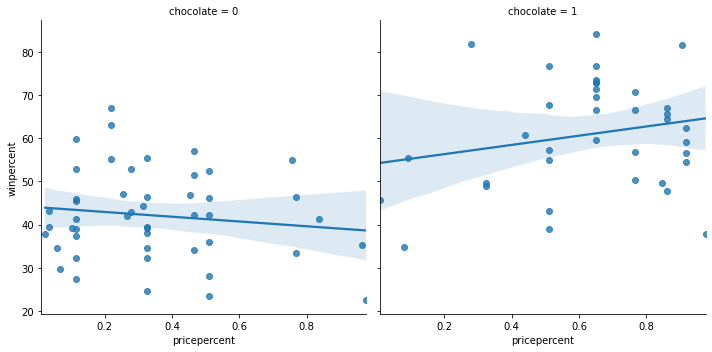

In [18]:
# assumption: sugar impacts the win percent.
sns.lmplot(x="pricepercent", y="winpercent", col='chocolate', data=data)

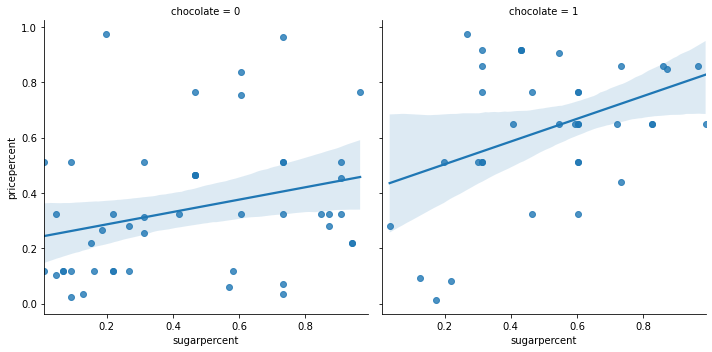

In [19]:
sns.lmplot(x="sugarpercent", y="pricepercent", col='chocolate', data=data)

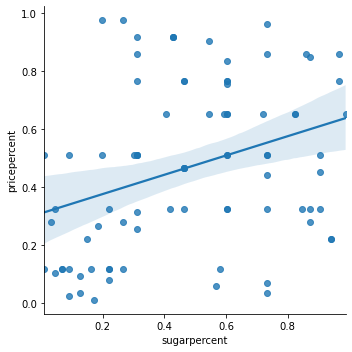

In [20]:
sns.lmplot(x="sugarpercent", y="pricepercent", data=data)

There is a multicollinearity between the 2 variables so I will remove one variable and do regression. 

# Algorithms

### Linear Regression as the baseline algorithm

In [21]:
df_lr = ols('winpercent ~ chocolate + fruity + caramel+peanutyalmondy + nougat + crispedricewafer + hard + bar + pluribus+ sugarpercent+pricepercent',
           data = data).fit()


In [22]:
df_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     7.797
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           9.50e-09
Time:                        23:21:52   Log-Likelihood:                -315.64
No. Observations:                  85   AIC:                             655.3
Df Residuals:                      73   BIC:                             684.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           34.5340      4.320      7.994      0.000      25.924      43.144
chocolate           19.7481      3.899      5.065      0.000      11.978      27.518
fruity               9.4223      3.763      2.504      0.015       1.923      16.922
caramel              2.2245      3.657      0.608      0.545      -5.065       9.514
peanutyalmondy      10.0707      3.616      2.785      0.007       2.864      17.277
nougat               0.8043      5.716      0.141      0.888     -10.588      12.197
crispedricewafer     8.9190      5.268      1.693      0.095      -1.580      19.418
hard                -6.1653      3.455     -1.784      0.079     -13.051       0.721
bar                  0.4415      5.061      0.087      0.931      -9.645      10.528
pluribus            -0.8545      3.040     -0.281      0.779      -6.913       5.204
sugarpercent         9.0868      4.659      1.950      0.055      -0.200      18.373
pricepercent        -5.9284      5.513     -1.075      0.286     -16.916       5.060
==============================================================================
Omnibus:                        1.025   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                1.000
Skew:                          -0.104   Prob(JB):                        0.606
Kurtosis:                       2.511   Cond. No.                         10.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This means that the present of chocolate would win the matchup 19%

In [24]:
9.50e-09 < 0.05

True